In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sf-salaries/Salaries.csv
/kaggle/input/sf-salaries/database.sqlite


In [2]:
Original_Salaries_dataset = pd.read_csv('../input/sf-salaries/Salaries.csv')
Salaries_dataset = Original_Salaries_dataset.copy()
Salaries_dataset.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


### Check null values in the dataset

In [3]:
Salaries_dataset.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

### Since the volume of NaNs of "Notes" and "Status" exceeds more than 60-70% of feature size, I decided to drop NaNs in the dataset.

In [4]:
BasePay_NaNs = (Salaries_dataset.BasePay.isnull().sum() / len(Salaries_dataset.BasePay))*100
Benefits_NaNs = (Salaries_dataset.Benefits.isnull().sum() / len(Salaries_dataset.Benefits))*100
Notes_NaNs = (Salaries_dataset.Notes.isnull().sum() / len(Salaries_dataset.Notes))*100
Status_NaNs = (Salaries_dataset.Status.isnull().sum() / len(Salaries_dataset.Status))*100

print("volume of NaNs of BasePay is " + str(round(BasePay_NaNs,2))+"%")
print("volume of NaNs of Benefits is " + str(round(Benefits_NaNs,2))+"%")
print("volume of NaNs of Notes is " + str(round(Notes_NaNs,2))+"%")
print("volume of NaNs of Status is " + str(round(Status_NaNs,2))+"%")

volume of NaNs of BasePay is 0.41%
volume of NaNs of Benefits is 24.32%
volume of NaNs of Notes is 100.0%
volume of NaNs of Status is 74.36%


In [5]:
Salaries_dataset = Salaries_dataset.drop(["Notes", "Status"], axis = 1)
Salaries_dataset.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,San Francisco


In [6]:
Salaries_dataset.EmployeeName.str.upper().value_counts().head(10)

KEVIN LEE       22
RICHARD LEE     19
WILLIAM WONG    18
STEVEN LEE      18
DAVID WONG      16
STANLEY LEE     16
JOHN CHAN       15
MICHAEL LEE     15
WILLIAM LEE     14
MICHAEL WONG    14
Name: EmployeeName, dtype: int64

In [7]:
Salaries_dataset.JobTitle

0         GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
1                        CAPTAIN III (POLICE DEPARTMENT)
2                        CAPTAIN III (POLICE DEPARTMENT)
3                   WIRE ROPE CABLE MAINTENANCE MECHANIC
4           DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)
                               ...                      
148649                                         Custodian
148650                                      Not provided
148651                                      Not provided
148652                                      Not provided
148653                        Counselor, Log Cabin Ranch
Name: JobTitle, Length: 148654, dtype: object

### Top 20 Job Title

Text(0.5, 1.0, 'Top 20 JobTitle')

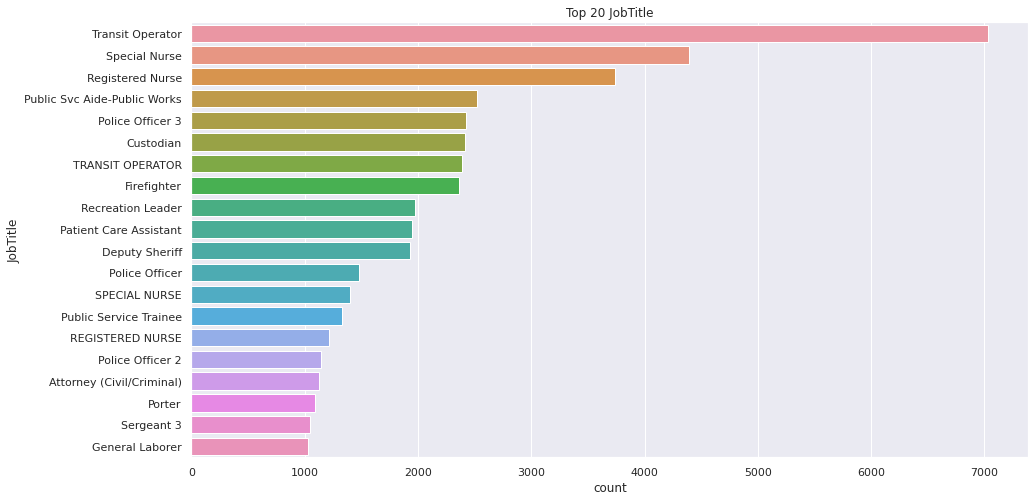

In [8]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(y="JobTitle", 
              data=Salaries_dataset, 
              order=Salaries_dataset.JobTitle.value_counts().iloc[:20].index).set_title('Top 20 JobTitle')

In [9]:
def label_graph(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 15)

### Number of Emloyee over Year (2011-2014)

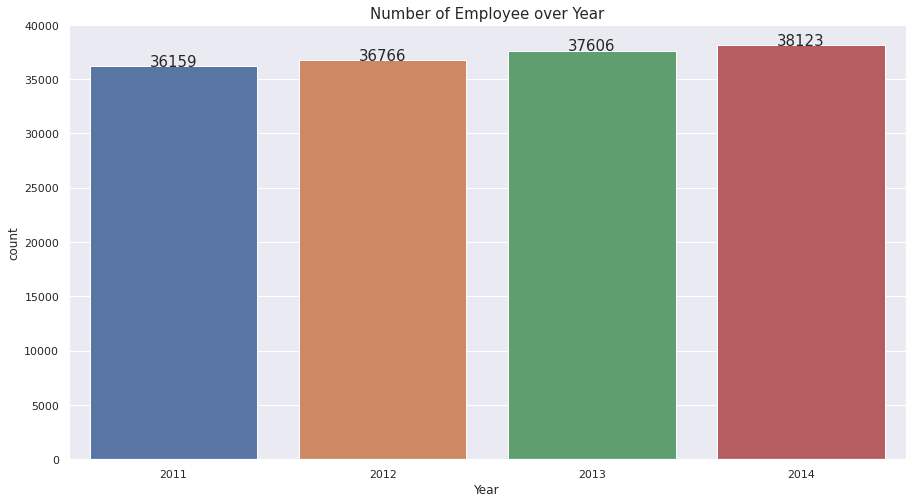

In [10]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.countplot(x = 'Year', data = Salaries_dataset)
ax.set_title('Number of Employee over Year', size=15)
label_graph(ax)
plt.show()

### Total pay over year (2011-2014)

In [11]:
Salaries_dataset.groupby("Year").mean()["TotalPay"]

Year
2011    71744.103871
2012    74113.262265
2013    77611.443142
2014    75463.918140
Name: TotalPay, dtype: float64

Text(0.5, 1.0, 'TotalPay over Year(2011-2014)')

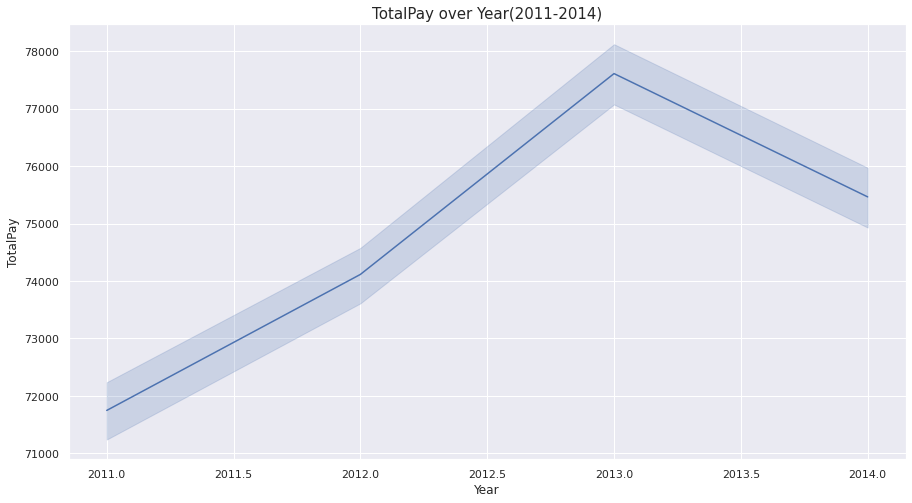

In [12]:
sns.lineplot(data=Salaries_dataset, x="Year", y="TotalPay").set_title('TotalPay over Year(2011-2014)', size=15)

### Total Pay Benefits Distribution over Year(2011-2014)

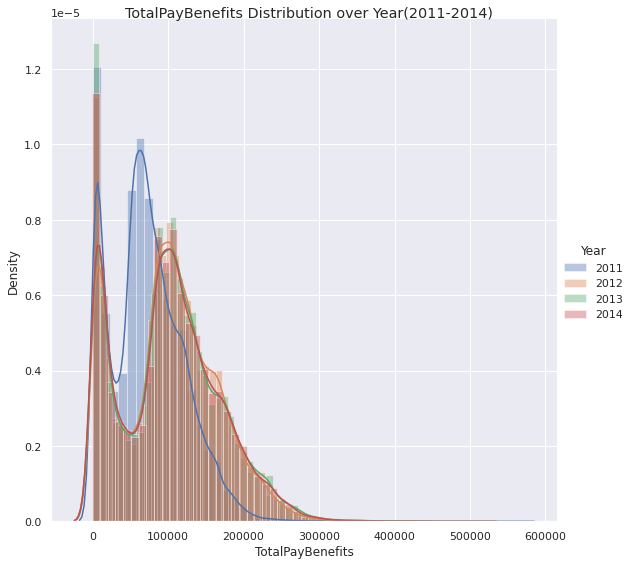

In [13]:
g = sns.FacetGrid(Salaries_dataset, hue='Year', size=8).map(sns.distplot, 'TotalPayBenefits').add_legend()
g.fig.suptitle('TotalPayBenefits Distribution over Year(2011-2014)')
plt.show();

In [14]:
Salaries_dataset_Gender = Salaries_dataset.copy()
Salaries_dataset_Gender.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,San Francisco


In [15]:
Salaries_dataset_Gender["EmployeeName"].isnull().sum()

0

### Get First Name from Employee Name

In [16]:
i = Salaries_dataset_Gender[(Salaries_dataset_Gender.EmployeeName == 'Not provided')].index
Salaries_dataset_Gender_clean = Salaries_dataset_Gender.drop(i)
Salaries_dataset_Gender_clean.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,San Francisco


In [17]:
Salaries_dataset_Gender_clean["FirstName"] = Salaries_dataset_Gender_clean["EmployeeName"].apply(lambda x: x[0:x.find(" ")])
Salaries_dataset_Gender_clean.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,FirstName
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,San Francisco,NATHANIEL
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco,GARY
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,San Francisco,ALBERT
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,San Francisco,CHRISTOPHER
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,San Francisco,PATRICK


In [18]:
Salaries_dataset_Gender_clean['FirstName'] = Salaries_dataset_Gender_clean['FirstName'].str.capitalize()
Salaries_dataset_Gender_clean.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,FirstName
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,San Francisco,Nathaniel
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco,Gary
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,San Francisco,Albert
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,San Francisco,Christopher
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,San Francisco,Patrick


### Using gender-guesser library to check who is male or female based on First Name

In [19]:
pip install gender-guesser


     |████████████████████████████████| 379 kB 886 kB/s            
Note: you may need to restart the kernel to use updated packages.


In [20]:
import gender_guesser.detector as gender
d = gender.Detector()

In [21]:
Salaries_dataset_Gender_clean['Gender'] = Salaries_dataset_Gender_clean['FirstName'].map(lambda x: d.get_gender(x, 'usa'))
Salaries_dataset_Gender_clean.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,FirstName,Gender
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,San Francisco,Nathaniel,male
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco,Gary,male
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,San Francisco,Albert,male
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,San Francisco,Christopher,male
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,San Francisco,Patrick,male


<AxesSubplot:xlabel='Gender', ylabel='count'>

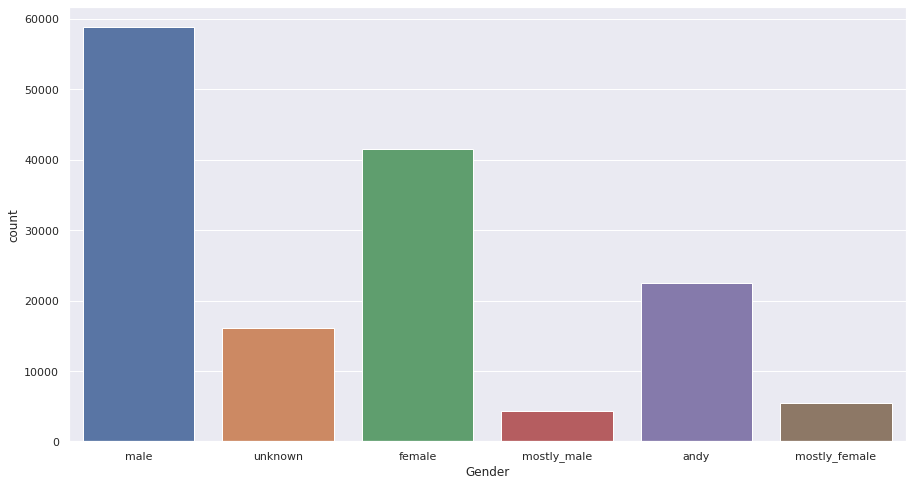

In [22]:
#Salaries_dataset_Gender_clean['Gender']
sns.countplot(x = 'Gender', data = Salaries_dataset_Gender_clean)

In the Gender-guesser library, the result shows the unknown (name not found), andy (androgynous), male, female, mostly_male, or mostly_female. To make it clear, I decided to drop unknown and andy names. And, I put mostly_male into male and put mostly female into the female.

In [23]:
Salaries_dataset_Gender_clean['Gender'] = Salaries_dataset_Gender_clean['Gender'].replace(['mostly_male'],'male')
Salaries_dataset_Gender_clean['Gender'] = Salaries_dataset_Gender_clean['Gender'].replace(['mostly_female'],'female')

In [24]:
G = Salaries_dataset_Gender_clean[(Salaries_dataset_Gender_clean.Gender == 'unknown')].index
Salaries_dataset_GenderV2 = Salaries_dataset_Gender_clean.drop(G)

In [25]:
G_andy = Salaries_dataset_Gender_clean[(Salaries_dataset_Gender_clean.Gender == 'andy')].index
Salaries_dataset_by_Gender = Salaries_dataset_GenderV2.drop(G_andy)

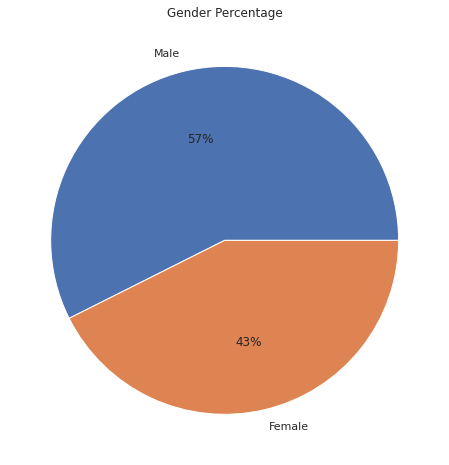

In [26]:
gender_size_data = [len(Salaries_dataset_by_Gender[Salaries_dataset_by_Gender['Gender']=='male']),
                    len(Salaries_dataset_by_Gender[Salaries_dataset_by_Gender['Gender']=='female'])]
gender_labels = ['Male', 'Female']
plt.title('Gender Percentage')
plt.pie(gender_size_data, labels = gender_labels, autopct='%.0f%%')
plt.show()

In [27]:
Salaries_dataset_by_Gender.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,FirstName,Gender
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,San Francisco,Nathaniel,male
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco,Gary,male
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,San Francisco,Albert,male
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,San Francisco,Christopher,male
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,San Francisco,Patrick,male


In [28]:
print("Length of Column: " +str(len(Salaries_dataset_by_Gender.columns)))
print("Length of Rows: " +str(len(Salaries_dataset_by_Gender.index)))

Length of Column: 13
Length of Rows: 110071


In [29]:
Salaries_dataset_by_Gender.groupby("Gender").mean()["TotalPay"]

Gender
female    67458.455331
male      85217.581298
Name: TotalPay, dtype: float64

In [30]:
(85217.581298 / 67458.455331)*100

126.32601929567002

### Total Pay over Year by Gender (2011-2014)
According to the graph, the average salary of men is 26% higher than that of females. But, this graph doesn't show the difference in salaries for the same job. The salaries range depends on the type of job, and the position of the job. So, We can't be sure there is a wage gap between males and females. 

Text(0.5, 1.0, 'TotalPay over Year by Gender (2011-2014)')

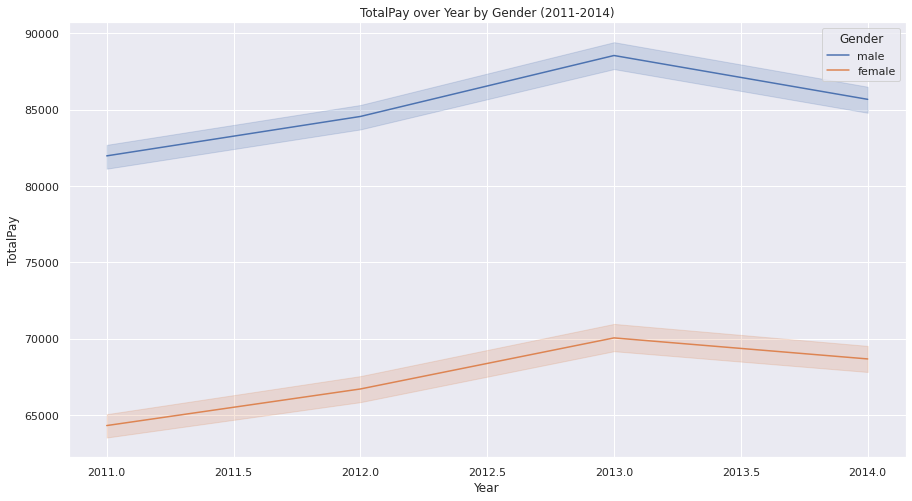

In [31]:
sns.lineplot(data=Salaries_dataset_by_Gender, x="Year", y="TotalPay", hue="Gender").set_title('TotalPay over Year by Gender (2011-2014)')

To determine the exact difference in salary between men and women, you need to check the difference in salary between the same position and the same occupation.This above graph shows which occupation has a large proportion of women and which occupation has a large proportion of men.

Text(0.5, 1.0, 'Top 20 JobTitle')

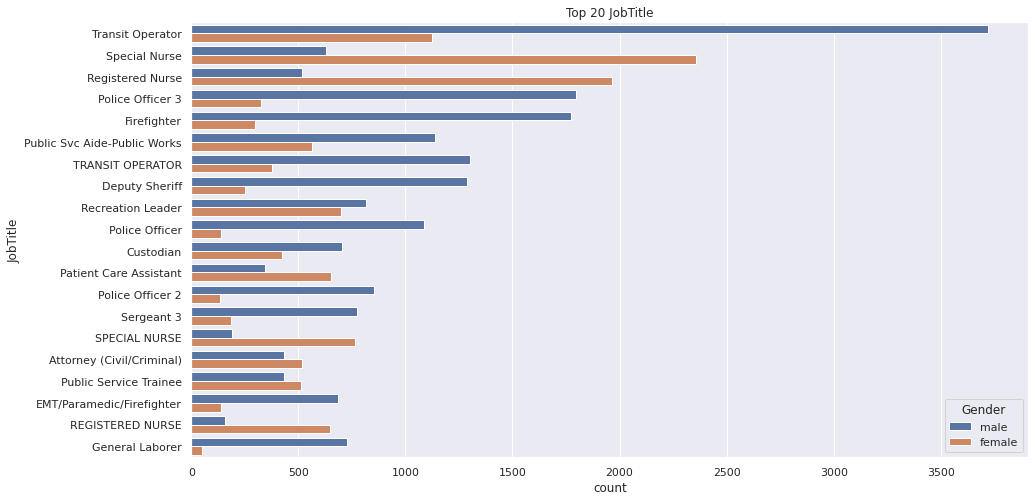

In [32]:
sns.countplot(y="JobTitle", 
              data=Salaries_dataset_by_Gender, 
              hue="Gender",
              order=Salaries_dataset_by_Gender.JobTitle.value_counts().iloc[:20].index).set_title('Top 20 JobTitle')

In [33]:
Salaries_dataset_Male= Salaries_dataset_by_Gender.copy()
Salaries_dataset_OnlyMale = Salaries_dataset_Male.loc[Salaries_dataset_Male['Gender']=='male']
Salaries_dataset_Female= Salaries_dataset_by_Gender.copy()
Salaries_dataset_OnlyFemale = Salaries_dataset_Female.loc[Salaries_dataset_Female['Gender']=='female']

### Top 10 Job Title by Gender
Based on this graph, men usually do traffic drivers, police officers, firefighters, etc. In addition, women's jobs are nurses, transfer companies, recreation leaders, and patient assistance.

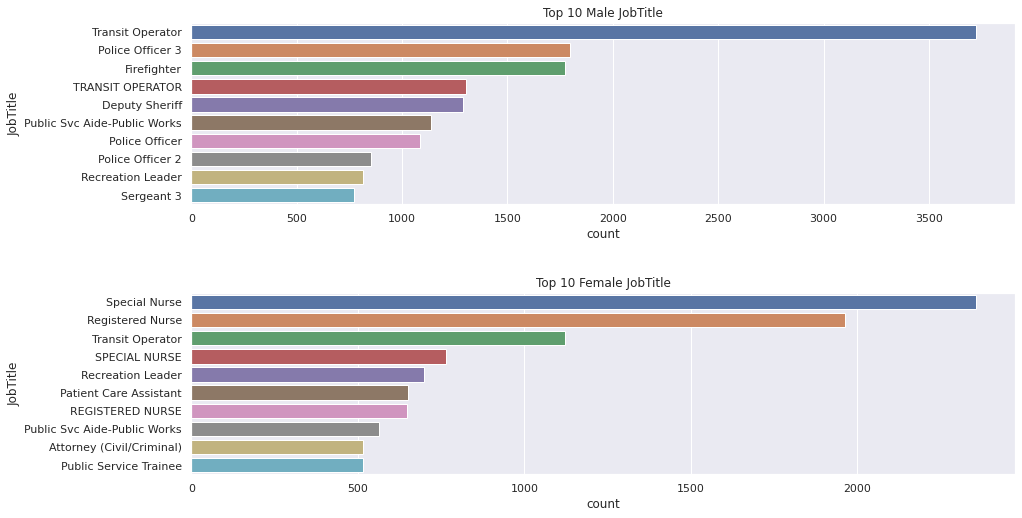

In [34]:
fig, axs = plt.subplots(nrows=2)
sns.countplot(y="JobTitle", 
              data=Salaries_dataset_OnlyMale,
              order=Salaries_dataset_OnlyMale.JobTitle.value_counts().iloc[:10].index,ax=axs[0]).set_title('Top 10 Male JobTitle')
sns.countplot(y="JobTitle", 
              data=Salaries_dataset_OnlyFemale,
              order=Salaries_dataset_OnlyFemale.JobTitle.value_counts().iloc[:10].index, ax=axs[1]).set_title('Top 10 Female JobTitle')
fig.tight_layout(pad=3.0)

### Salaries Difference by Gender for Transit Operator
Since the transit operator is the job that both men and women are in the top 10 jobs, let's check the difference in salary.

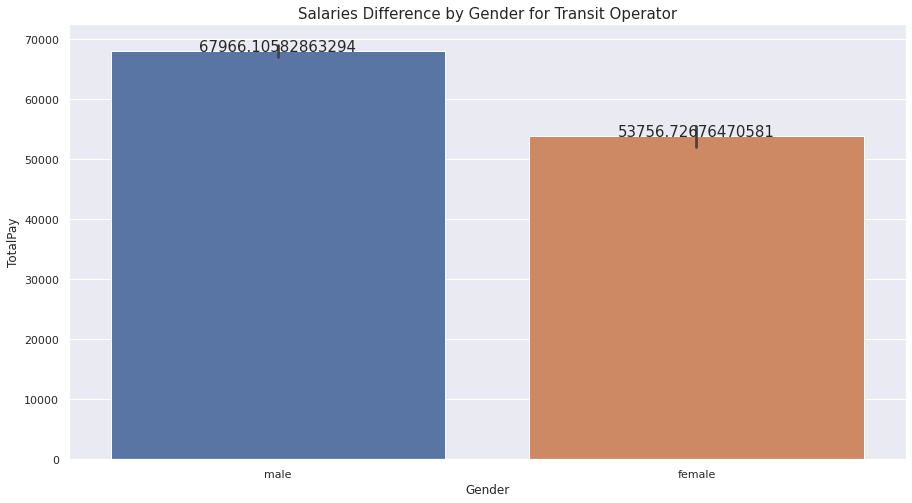

In [35]:
ax2 = sns.barplot(data =Salaries_dataset_by_Gender[Salaries_dataset_by_Gender['JobTitle']=='Transit Operator'],
                  x = "Gender",
                  y = "TotalPay")
ax2.set_title('Salaries Difference by Gender for Transit Operator', size=15)
label_graph(ax2)
plt.show()

### Salaries Difference by Gender for Speical Nurse
So, we know there is a difference in wages between men and women in transfer drivers. Let's check out other jobs with a large proportion of women. Looking at the graph above, which shows the top 10 male and female jobs, we can see that Special Nurse is a job that women usually do.

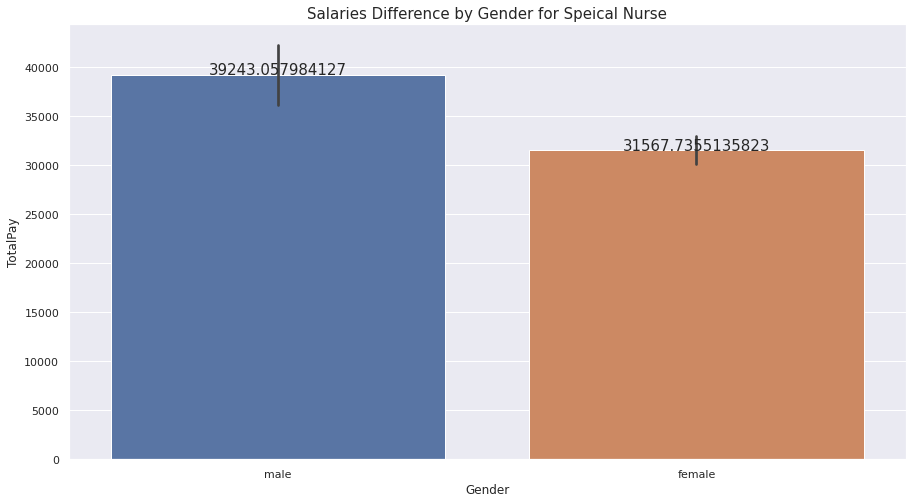

In [36]:
ax3 = sns.barplot(data =Salaries_dataset_by_Gender[Salaries_dataset_by_Gender['JobTitle']=='Special Nurse'],
                  x = "Gender",
                  y = "TotalPay")
ax3.set_title('Salaries Difference by Gender for Speical Nurse', size=15)
label_graph(ax3)
plt.show()

So we know that there is a wage difference between men and women. Is there any job that the female get more salaries than the male?

In [37]:
Salaries_dataset_by_Gender['JobTitle'].values

array(['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY',
       'CAPTAIN III (POLICE DEPARTMENT)',
       'CAPTAIN III (POLICE DEPARTMENT)', ..., 'Custodian', 'Custodian',
       'Counselor, Log Cabin Ranch'], dtype=object)

In [38]:
len(Salaries_dataset_by_Gender['JobTitle'].values)

110071

### Test Top 3000 data from 110071 dataset

In [39]:
Male_Salaries = []
for i in range(0, len(Salaries_dataset_by_Gender['JobTitle'].values[:3001])-1):
    Male_Salaries.append(Salaries_dataset_by_Gender[Salaries_dataset_by_Gender['JobTitle']==Salaries_dataset_by_Gender['JobTitle'].values[i]][Salaries_dataset_by_Gender['Gender']=='male']['TotalPay'].mean())

In [40]:
Female_Salaries = []
for i in range(0, len(Salaries_dataset_by_Gender['JobTitle'].values[:3001])-1):
    Female_Salaries.append(Salaries_dataset_by_Gender[Salaries_dataset_by_Gender['JobTitle']==Salaries_dataset_by_Gender['JobTitle'].values[i]][Salaries_dataset_by_Gender['Gender']=='female']['TotalPay'].mean())

In [41]:
Gender_Salaries_data = {'JobTitle': Salaries_dataset_by_Gender['JobTitle'].values[:3000], 
                       'Male_Salaries':Male_Salaries, 
                       'Female_Salaries':Female_Salaries}
Gender_Salaries = pd.DataFrame(Gender_Salaries_data)
Gender_Salaries

,JobTitle,Male_Salaries,Female_Salaries
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,399211.275000,NaN
1,CAPTAIN III (POLICE DEPARTMENT),215561.715769,203107.473333
2,CAPTAIN III (POLICE DEPARTMENT),215561.715769,203107.473333
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,145073.492500,NaN
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",288356.270000,261366.140000
...,...,...,...
2995,SHERIFF'S LIEUTENANT,136484.114000,128048.831667
2996,TRANSIT SUPERVISOR,117992.110650,95045.876944
2997,IS BUSINESS ANALYST - PRINCIPAL,106532.319750,109262.655455
2998,FIREFIGHTER,140531.465034,129348.017905


We have the top 3000 salaries difference by gender. In the "GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY" job, it shows NaNs in the female section because there is no female data of "GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY" job. To compare the salaries difference, I will just remove NaNs value in the data. 

In [42]:
Gender_Salaries_dataset = Gender_Salaries.dropna()

In [43]:
Gender_Salaries_dataset

,JobTitle,Male_Salaries,Female_Salaries
1,CAPTAIN III (POLICE DEPARTMENT),215561.715769,203107.473333
2,CAPTAIN III (POLICE DEPARTMENT),215561.715769,203107.473333
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",288356.270000,261366.140000
5,ASSISTANT DEPUTY CHIEF II,235149.870000,203023.050000
7,"BATTALION CHIEF, (FIRE DEPARTMENT)",218203.607838,180388.765000
...,...,...,...
2995,SHERIFF'S LIEUTENANT,136484.114000,128048.831667
2996,TRANSIT SUPERVISOR,117992.110650,95045.876944
2997,IS BUSINESS ANALYST - PRINCIPAL,106532.319750,109262.655455
2998,FIREFIGHTER,140531.465034,129348.017905


In [44]:
Higher_female_salaries =[]
for i in range(0, len(Gender_Salaries_dataset)-1):
    if Gender_Salaries_dataset['Female_Salaries'].values[i] > Gender_Salaries_dataset['Male_Salaries'].values[i]:
        Higher_female_salaries.append(Gender_Salaries_dataset['JobTitle'].values[i])
len(Higher_female_salaries)

444

### Jobs where women's salaries are higher than men's salaries.

In [45]:
Higher_female_salaries_Job = []
for i in Higher_female_salaries:
    if i not in Higher_female_salaries_Job:
        Higher_female_salaries_Job.append(i)
print(len(Higher_female_salaries_Job))
Higher_female_salaries_Job

50


['DEPARTMENT HEAD V',
 'ASSISTANT MEDICAL EXAMINER',
 'DEPUTY CHIEF III (POLICE DEPARTMENT)',
 'ELECTRICAL TRANSIT MECHANIC, ASSISTANT SUPERVISOR',
 'MANAGER VII',
 'INSPECTOR, BUREAU OF FIRE PREVENTION AND PUBLIC SA',
 'ANESTHETIST',
 'DEPUTY DIRECTOR II - MUNICIPAL TRANSPORTATION AG',
 'MANAGER VIII',
 'ELECTRICAL TRANSIT SYSTEM MECHANIC',
 'NURSE MANAGER',
 'ELECTRICAL TRANSIT SHOP SUPERVISOR I',
 'DEPUTY DIRECTOR IV',
 'ASSISTANT CHIEF ATTORNEY II',
 'DEPUTY DIRECTOR III',
 'DIAGNOSTIC IMAGING TECH III',
 'CHIEF ADULT PROBATION OFFICER',
 'PHYSICIAN ASSISTANT',
 'ELECTRONIC MAINTENANCE TECHNICIAN',
 'ASSOCIATE ENGINEER',
 'PROJECT MANAGER IV',
 'PILOT OF FIRE BOATS',
 'DEPARTMENT HEAD I',
 'SENIOR ENGINEER',
 'PRINCIPAL CIVIL ENGINEER',
 'ELECTRICAL TRANSIT MECHANIC SUPERVISOR I',
 'MANAGER V',
 'PROJECT MANAGER III',
 'MAYORAL STAFF XVII',
 'MANAGER VII - MUNICIPAL TRANSPORTATION AGENCY',
 'MANAGER VIII - MUNICIPAL TRANSPORTATION AGENCY',
 'MANAGER IV',
 'IS ENGINEER - PRINCIPAL',

### In sf-salaries.csv data, it has 110071 rows of data with 2103 unique task titles. It took too long to test only the top 3,000 data among the 110071 datasets. Of the total 3,000 job datasets (198 unique jobs), there are 444 jobs (50 unique jobs), where women's salaries are higher than men's. So there are about 15% of jobs where women are paid more than men.

### Since I tested only 2.7% of the total dataset, I'm not sure if there's a wage gap between men and women. Although this dataset shows that there is a slight wage gap between men and women, there are also jobs where women are paid higher.

### In order to accurately compare the salaries difference between the male and the female, I think we have to consider job title, levels, year of experience, location, etc. 
